In [1]:
!pip install librosa

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [3]:
filename = "339_full_okay-you-wanna-see_0136_preview.wav"

In [4]:
y, sr = librosa.load(filename)

In [5]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Tempo: {:.2f}'.format(tempo))

Tempo: 103.36


In [6]:
#The initial tempo offered by Librosa is far off from the true tempo of the track. I input the bpm that is already assigned to the track to see if it creates a better prediction.

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, start_bpm=157)
print('Tempo: {:.2f}'.format(tempo))

Tempo: 161.50


In [7]:
#161.5 is much closer - however - I still believe 157 is the correct parameter. I played with other settings and still could not get Librosa to determine the bpm to be 157.
#There are certain sections of the track that could be faster - so I created a spectrogram in order to see if the beat is smooth all the way through. If the image was larger it would be possible to see if this song has a single tempo, or if it changes slightly in the second half of the song.

tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, start_bpm=157, tightness = 25, trim = True)
print('Tempo: {:.2f}'.format(tempo))

Tempo: 161.50


In [8]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

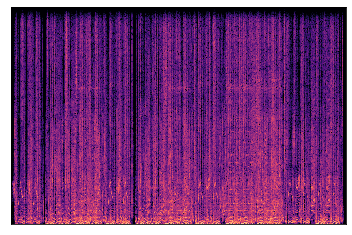

In [10]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, ax=ax)

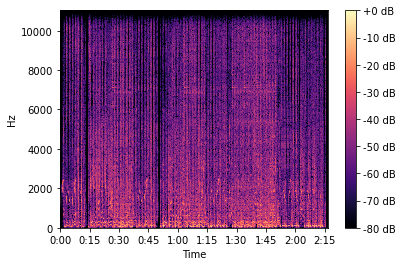

In [11]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

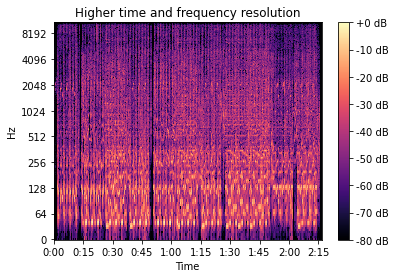

In [13]:
#Higher resolution, using log scale
fig, ax = plt.subplots()
D_highres = librosa.stft(y, hop_length=256, n_fft=4096)
S_db_hr = librosa.amplitude_to_db(np.abs(D_highres), ref=np.max)
img = librosa.display.specshow(S_db_hr, hop_length=256, x_axis='time', y_axis='log',
                               ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

#At this resolution, it is still difficult to visually determine if the track has a consistent tempo.